In [ ]:
import os
from IPython.display import Audio

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Audio
import skimage as sk

In [36]:
def gaussian_noise(x, severity=1):
    import random
    deg = random.randint(-severity*6-5, severity*6+5)
    return x.rotate(deg)

# Load the image
image_path = "/mnt/user/saksham/AV_robust/AV-C-Robustness-Benchmark/data_recipe/analysis_helper/data/clean/playing_violin__fiddle.jpg"  # Change this to your image path
original = cv2.imread(image_path)  # Load using OpenCV
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Apply Gaussian noise at severity 1 and 5
image_severity_1 = gaussian_noise(original, severity=1).astype(np.uint8)
image_severity_5 = gaussian_noise(original, severity=5).astype(np.uint8)

# Display the images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(original)
axes[0].set_title("Original")
axes[1].imshow(image_severity_1)
axes[1].set_title("Severity 1")
axes[2].imshow(image_severity_5)
axes[2].set_title("Severity 5")

for ax in axes:
    ax.axis("off")

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'rotate'

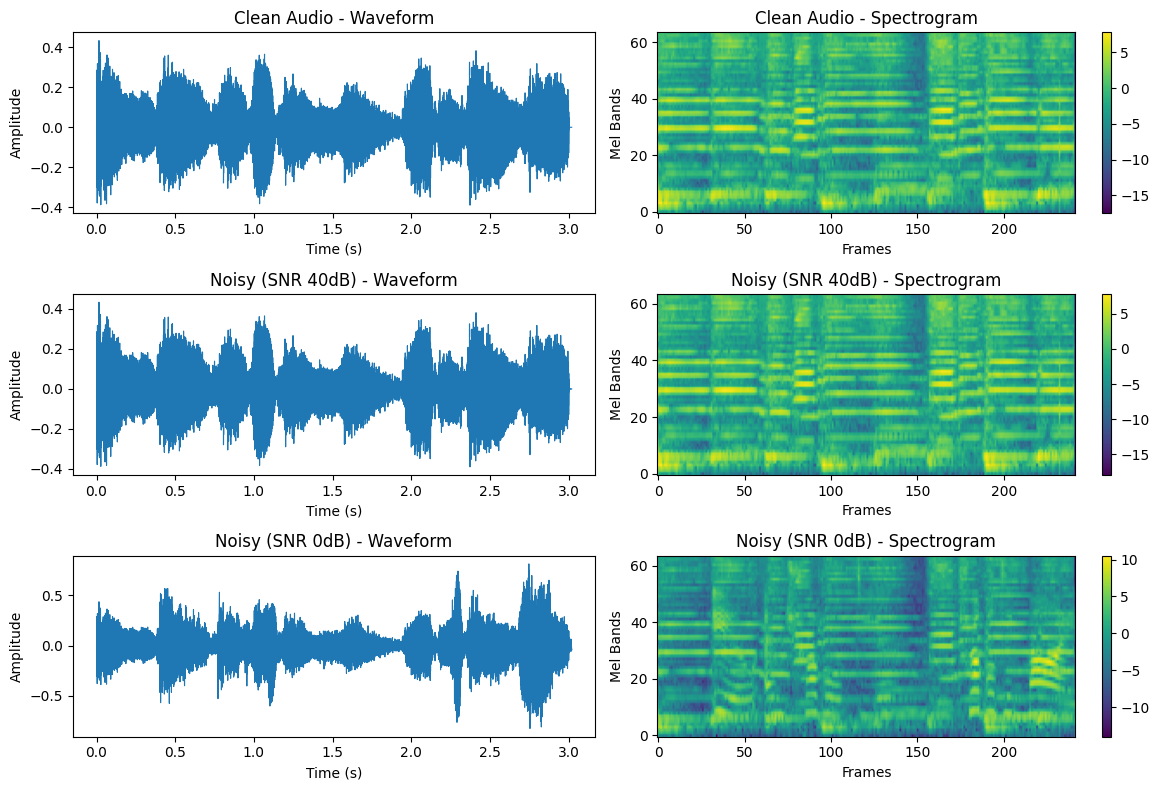

In [ ]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

NOISE_SNRS = [40, 30, 20, 10, 0]  # SNR levels for different noise intensities

def add_gaussian_noise(audio_file, intensity):    
    waveform, sr = torchaudio.load(audio_file)
    severity_levels = {1: 0.1, 2: 0.2, 3: 0.3, 4: 0.4, 5: 0.5}  # Fraction of audio to be muted
    mask_fraction = severity_levels[intensity]

    total_samples = waveform.shape[1]
    num_mask_samples = int(total_samples * mask_fraction)

    # Generate random mask indices
    mask_indices = random.sample(range(total_samples), num_mask_samples)
    waveform[:, mask_indices] = 0

    return waveform_noise

    

def plot_waveform_and_spectrogram(waveform, sr, title, ax1, ax2):
    """
    Plots the waveform and spectrogram of an audio signal.
    """
    ax1.plot(torch.arange(waveform.shape[1]) / sr, waveform.numpy().squeeze(), linewidth=0.8)
    ax1.set_title(f"{title} - Waveform")
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Amplitude")

    transform = T.MelSpectrogram(sample_rate=sr, n_mels=64)
    mel_spec = transform(waveform)

    im = ax2.imshow(mel_spec.log2().numpy().squeeze(), aspect='auto', origin='lower')
    ax2.set_title(f"{title} - Spectrogram")
    ax2.set_xlabel("Frames")
    ax2.set_ylabel("Mel Bands")
    plt.colorbar(im, ax=ax2)

# Load audio file
audio_path = "/mnt/user/saksham/AV_robust/AV-C-Robustness-Benchmark/data_recipe/analysis_helper/data/clean/playing_violin__fiddle.wav"  # Change this to your actual audio file path
waveform, sr = torchaudio.load(audio_path)

# Generate noisy versions
waveform_noise_1 = add_gaussian_noise(audio_path, 1)  # Least noise (SNR = 40dB)
waveform_noise_5 = add_gaussian_noise(audio_path, 5)  # Most noise (SNR = 0dB)

# Plot waveforms and spectrograms
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

plot_waveform_and_spectrogram(waveform, sr, "Clean Audio", axes[0, 0], axes[0, 1])
plot_waveform_and_spectrogram(waveform_noise_1, sr, "Noisy (SNR 40dB)", axes[1, 0], axes[1, 1])
plot_waveform_and_spectrogram(waveform_noise_5, sr, "Noisy (SNR 0dB)", axes[2, 0], axes[2, 1])

plt.tight_layout()
plt.show()


In [35]:
Audio(waveform_noise_5, rate=sr)